# SVM model

SVM model

----------------------------------------------------------
----------------------------------------------------------
Load train data......

Load test data......
----------------------------------------------------------
Start SVM model....
Training the model ...

Loading the saved SVM model...
Saved SVM model loaded successfully.
Predicting test data ...
Test the model......

Displaying Result

----------------------------------------------------------
----------------------------------------------------------
Confusion matrix:
[[   16     0]
 [40983 20205]]

Accuracy in %: 33.038690281680935 %
precision:  1.0
Recall:  0.0003902534208151418
F_Score:  0.0007802023649884189

Confusion matrix without threshold:
TNR: 1.0 FPR: 0.0
TPR: 0.0003902534208151418 FNR: 0.9996097465791849
----------------------------------------------------------
----------------------------------------------------------
Confusion matrix with threshold: 0.36101245139862437
[[40778 11311]
 [  221  8894]]

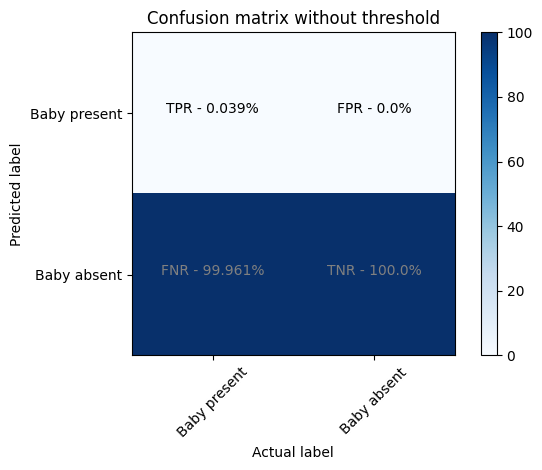

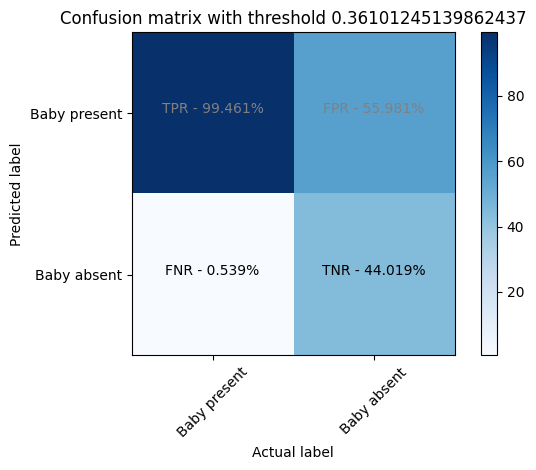

Saving the trained SVM model...
Trained SVM model saved successfully.


In [1]:
#import all the necessary packages
import numpy as np
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import itertools
from joblib import dump, load  # Added joblib for model saving/loading

print("SVM model")
print("")
print("----------------------------------------------------------")
print("----------------------------------------------------------")
print("Load train data......")
# Load the training data
train_data = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/train.npy') 
train_label = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/train_label.npy')

print("")
print("Load test data......")
# Load the test data based on the test type
#test_1 is for testing with baby present and absent
#test_data = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_1.npy')
#test_label = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_label_1.npy')

#test_2 is for testing with baby present(sunscreen and scarf) and absent while the model is trained without sunscreen and scarf
#test_data = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_2.npy')
#test_label = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_label_2.npy')

#test_all is for testing with baby present, sunscreen, scarf and absent while the model is trained without sunscreen and scarf
test_data = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_all.npy')
test_label = np.load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/numpy_data/test_label_all.npy')

print("----------------------------------------------------------")
# Define the SVM model with a linear kernel
print("Start SVM model....")
svm_model = SVC(kernel='rbf', probability=True)

# Train the SVM model
print("Training the model ...")
#svm_model.fit(train_data, train_label)
print("")

# Load the saved SVM model
print("Loading the saved SVM model...")
svm_model = load('/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/saved_models/svm_model.joblib')
print("Saved SVM model loaded successfully.")

# Test the SVM model
print("Predicting test data ...")
test_pred = svm_model.predict(test_data)

# Calculate the probability estimates for each test example
print("Test the model......")
test_pred_probs = svm_model.predict_proba(test_data)
print("")
print("Displaying Result")
y_pred_classes = np.round(test_pred)
print("")


# Find the threshold that maximizes TPR while keeping FPR constant
fpr, tpr, thresholds = metrics.roc_curve(test_label, test_pred_probs[:,1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Adjust the threshold
test_pred_labels_adjusted = np.zeros(len(test_pred))
for i in range(len(test_pred)):
    if test_pred_probs[i][1] > optimal_threshold:
        test_pred_labels_adjusted[i] = 1

# Create the confusion matrix
tn1, fn1, fp1, tp1 = metrics.confusion_matrix(y_pred_classes, test_label).ravel()
accuracy = (tn1+tp1)/(tp1+tn1+fp1+fn1)
precision= tp1/(tp1+fp1)
Recall= tp1/(tp1+fn1)
F_Score = (2*precision*Recall) / (precision + Recall)
conf_mat = np.array([[tp1, fp1], [fn1, tn1]])
print("----------------------------------------------------------")
print("----------------------------------------------------------")
print('Confusion matrix:')
print(conf_mat)
print("")
print('Accuracy in %:', accuracy*100, '%')
print("precision: ", precision)
print("Recall: ", Recall)
print("F_Score: ", F_Score)
tpr1 = tp1 / (tp1 + fn1)
tnr1 = tn1 / (tn1 + fp1)
fpr1 = fp1 / (tn1 + fp1)
fnr1 = fn1 / (fn1 + tp1)
cm= np.array([[tpr1*100, fpr1*100], [fnr1*100, tnr1*100]])
print("")
print('Confusion matrix without threshold:')
print('TNR:', tnr1, 'FPR:', fpr1)
print('TPR:', tpr1, 'FNR:', fnr1)
print("----------------------------------------------------------")
print("----------------------------------------------------------")

# Create the adjusted confusion matrix
TN, FN, FP, TP = metrics.confusion_matrix(test_pred_labels_adjusted, test_label).ravel()
conf_mat_adjusted = np.array([[TP, FP], [FN, TN]])
# Calculate the TPR, TNR, FNR, and FPR
TPR = TP / (TP + FN) #rue positive rate
TNR = TN / (TN + FP) #rue negative rate
FNR = FN / (FN + TP) #false negative rate
FPR = FP / (FP + TN) #false positive rate
accuracy1 = (TN+TP)/(TP+TN+FP+FN)
precision1 = TP/(TP+FP)
Recall1 = TP/(TP+FN)
F_Score1 = (2*precision1 * Recall1) / (precision1 + Recall1)
print('Confusion matrix with threshold:', optimal_threshold)
print(conf_mat_adjusted)
print("")
print('Accuracy in %:', accuracy1*100, '%')
print("precision: ", precision1)
print("Recall: ", Recall1)
print("F_Score: ", F_Score1)
print("")
cc= np.array([[TPR*100, FPR*100], [FNR*100, TNR*100]])
print('TNR:', TNR, 'FPR:', FPR)
print('TPR:', TPR, 'FNR:', FNR)
print("----------------------------------------------------------")
print("----------------------------------------------------------")


# Plot the confusion matrix
class_names = ['Baby present', 'Baby absent']
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix without threshold')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
fmt = 'f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if i==0 and j==0:
        labels= 'TPR - '
    elif i==0 and j==1:
        labels= 'FPR - '
    elif i==1 and j==0:
        labels= 'FNR - '
    elif i==1 and j==1:
        labels= 'TNR - '
    texts = round((cm[i,j]), 3)
    plt.text(j, i, labels + str(texts) + '%',
             horizontalalignment="center",
             color="gray" if cm[i, j] > thresh else "black")
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
plt.tight_layout()
plt.show()

plt2.imshow(cc, interpolation='nearest', cmap=plt2.cm.Blues)
plt2.title('Confusion matrix with threshold ' + str(optimal_threshold))
plt2.colorbar()
tick_marks = np.arange(len(class_names))
plt2.xticks(tick_marks, class_names, rotation=45)
plt2.yticks(tick_marks, class_names)
fmt = 'f'
thresh = cc.max() / 2.
for i, j in itertools.product(range(cc.shape[0]), range(cc.shape[1])):
    if i==0 and j==0:
        labels= 'TPR - '
    elif i==0 and j==1:
        labels= 'FPR - '
    elif i==1 and j==0:
        labels= 'FNR - '
    elif i==1 and j==1:
        labels= 'TNR - '
    texts = round((cc[i,j]), 3)
    plt2.text(j, i, labels + str(texts) + '%',
             horizontalalignment="center",
             color="gray" if cc[i, j] > thresh else "black")
plt2.ylabel('Predicted label')
plt2.xlabel('Actual label')
plt2.tight_layout()
plt2.show()

# Save the trained SVM model
print("Saving the trained SVM model...")
dump(svm_model, '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/data/saved_models/svm_model.joblib')
print("Trained SVM model saved successfully.")